<a href="https://colab.research.google.com/github/mobilttterbang/Water_Feasibility_Project/blob/main/Water_Feasibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WATER FEASIBILITY PREDICTION

## Overview

Predict weather the water is feasible enough to be called deserve to drink
source (DSC GAMMAFEST Competition) : https://www.kaggle.com/competitions/water-feasibility-prediction-gammafest/

###<b> Understanding Business Problem </b>

**Problem** : In this competition, the participant was asked to do some <strong>prediction of water feasibility </strong> using provided data, and then passed the prediction result onto the Output column named 'DC201'.
<br>
**Objective** : Water Feasibility Prediction.<br>
**Success Metric** : Water Feasibility Prediction Accuration > 80%.<br>
**User** : Researcher.<br>

## Import Dependencies and Filers

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount drive to save/upload file permanently after upload it to gdrive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import train Data
df = pd.read_csv("/content/drive/MyDrive/FATHUN | !!!CAUTIONS, ADULT ONLY!!!!/Portofolio/Data Science/Water Feasibility DSC GAMMAFEST /train.csv", index_col="id")

## Data Processing

### Statistical of the Data

In [ ]:
df.shape

(35973, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35973 entries, 1 to 47963
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DC024   35973 non-null  int64  
 1   DC025   35973 non-null  int64  
 2   DC205   35962 non-null  float64
 3   DC206   35952 non-null  float64
 4   DC207   35929 non-null  float64
 5   DC208   35960 non-null  float64
 6   DC209   35955 non-null  float64
 7   DC210   35932 non-null  float64
 8   DC211   35949 non-null  float64
 9   DC212   35949 non-null  float64
 10  DC213   35896 non-null  float64
 11  DC214   35964 non-null  float64
 12  DC215   35959 non-null  float64
 13  DC216   35934 non-null  float64
 14  DC217   35973 non-null  int64  
 15  DC219   35973 non-null  int64  
 16  DC220   35969 non-null  float64
 17  DC226   35967 non-null  float64
 18  DC230a  35962 non-null  float64
 19  DC230b  32964 non-null  float64
 20  DC232   32949 non-null  float64
 21  DC232b  32949 non-null  float64
 22

### Checking Duplicated Values

In [ ]:
# check duplicated data
print(f"there are {df.duplicated().sum()} duplicated data, they are:")
df[df.duplicated()]

there are 4 duplicated data, they are:


,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,DC213,DC214,DC215,DC216,DC217,DC219,DC220,DC226,DC230a,DC230b,DC232,DC232b,DC235,DC237,DC237a,DC237b,DC237c,DC237d,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4333,12,1,17.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,35.0,31.0,1.0,1,1,24.0,95.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,1,21.0,12.0,Layak Minum
12036,21,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,33.0,35.0,32.0,2.0,4,1,47.0,2.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4,11.0,60.0,Layak Minum
24256,35,1,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,31.0,33.0,1.0,5,1,21.0,95.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1,21.0,18.0,Layak Minum
42063,74,1,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,35.0,31.0,1.0,5,2,19.0,5.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0,0.0,1,11.0,20.0,Layak Minum


In [ ]:
# delete duplicate data
df = df.drop_duplicates(keep='first').copy()

### Feature Engineering

In [ ]:
# Removing unrelated features
df = df[['DC024', 'DC025', 'DC205', 'DC206',
      #'DC207', 'DC208', 'DC209', 'DC210',
       'DC211', 'DC212', 'DC213', 'DC214', 'DC215',
      #'DC216',
       'DC217', 'DC219',
       'DC220', 'DC226', 'DC230a', 'DC230b', 'DC232', 'DC232b', 'DC235',
       'DC237', 'DC237a', 'DC237b', 'DC237c', 'DC237d', 'DC237e', 'DC237f',
       'DC241', 'DC242', 'DC244', 'DC246', 'DC252', 'DC270a', 'DC109',
       'DC142a', 'DC201']].copy()

***OPTIONAL IF I'M NOT DELETE DC216***

for house with area less than 9m² and room for sleeping more than 1
dfc.query("DC142a <= 9 & DC216 > 1 | DC216 == 20")
dfc[~((dfc["DC142a"] <= 9) & (dfc["DC216"] > 1))]

I've found some unlogical data between DC142a AS house floor-area and DC216 AS number of room used for sleeping which can be a representative of number of people in the house.

In [ ]:
# remove house with area < 9 m² since it's minimum standards for a room to be used
df = df.drop(df[df["DC142a"]<9].index).copy()

In [ ]:
# remove head of household with age less than 17 years old
# since people can't have KK under the age of 17
# which means those people can't be the head of household
df = df.drop(df[df["DC220"] <= 16].index).copy()

In [ ]:
 # Transform features datatype into categories
# since all of these are ordinal values actually
columns = df.drop(["DC142a","DC201"], axis=1).columns.tolist()

df[columns] = df[columns].astype("category")

### Handling Missing Values

In [ ]:
cols = ['DC024', 'DC025', 'DC205', 'DC206', 'DC211', 'DC212', 'DC213', 'DC214',
       'DC215', 'DC217', 'DC219', 'DC220', 'DC226', 'DC230a', 'DC237', 'DC237a', 'DC237b', 'DC237c',
       'DC237d', 'DC237e', 'DC237f', 'DC244', 'DC246',
       'DC252', 'DC270a', 'DC109', 'DC142a', 'DC201']

df.dropna(subset=cols, inplace=True)

In [ ]:
df = df.drop("DC235",axis=1)

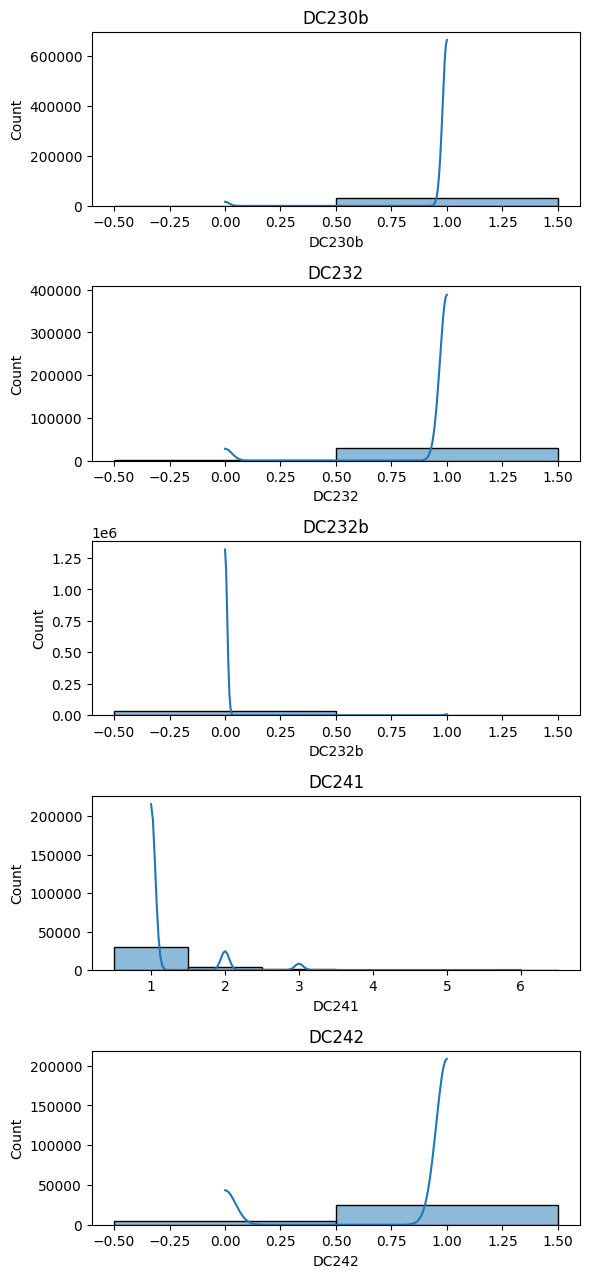

In [ ]:
# visualizing features with missing value
cols = ["DC230b","DC232","DC232b","DC241","DC242"]
plt.figure(figsize=(6,15))
for idx, col in enumerate(cols):
  plt.subplot(6,1,idx+1)
  sns.histplot(data=df, x=df[col], kde=True)
  plt.title(col)
  plt.tight_layout()
plt.show()

In [ ]:
for col in cols:
  df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
print(f" the number of missing value \
is now {df.isna().sum().sum()}")

 the number of missing value is now 0


### Transform the Data

In [ ]:
dfc = df.copy()

In [ ]:
# normalize the value for DC142a which represents Floor Area
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the data to a 2D array since MinMaxScaler expects a 2D input
data_to_normalize = df['DC142a'].values.reshape(-1, 1)

# Fit and transform the data with MinMaxScaler
normalized_data = scaler.fit_transform(data_to_normalize)

# Update the 'DC142a' column in the original DataFrame with the normalized values
df['DC142a'] = normalized_data

print("normalize is done")

normalize is done


Now I'm going to convert my target variable using ordinal encoder

In [ ]:
#ORDINAL ENCODER
from sklearn.preprocessing import OrdinalEncoder

# Define the target variable 'DC201'
target_variable = df['DC201']

# Create an OrdinalEncoder object
encoder = OrdinalEncoder()

# Reshape the target variable to a 2D array since OrdinalEncoder expects a 2D input
encoded_target = encoder.fit_transform(target_variable.values.reshape(-1, 1))

# Update the 'DC201' column in the original DataFrame with the encoded values
df['DC201'] = encoded_target

print("encoding is done")

encoding is done


## Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['DC201'])
y = df['DC201']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)

## Modelling the Data

### Random Forest Classification

In [ ]:
# Import Dependencies
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

Before creating a final model for the data i want to do the hyperparameter tuning first so i will not repeat the train and predict phase again.

#### Hyper Parameters Tuning

In [ ]:
param_dist = {'n_estimators': randint(50,500),'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d43203211b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d4320320dc0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 187}


#### Train the model

In [ ]:
rf = RandomForestClassifier(n_estimators = 187, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)
print("train is done 👍")

train is done 👍


In [ ]:
# Validation
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9122042873003673
Precision: 0.8212895169764179
Recall: 0.5930118348285809


#### Evaluation Matrix

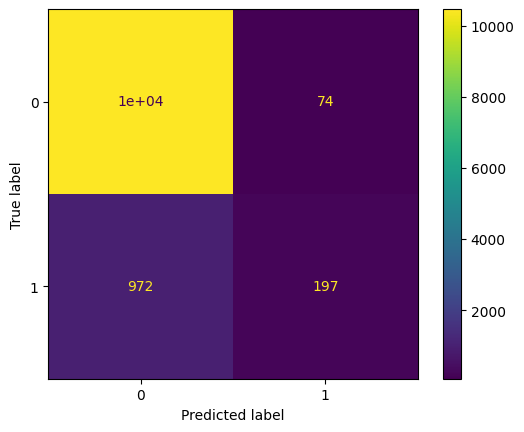

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

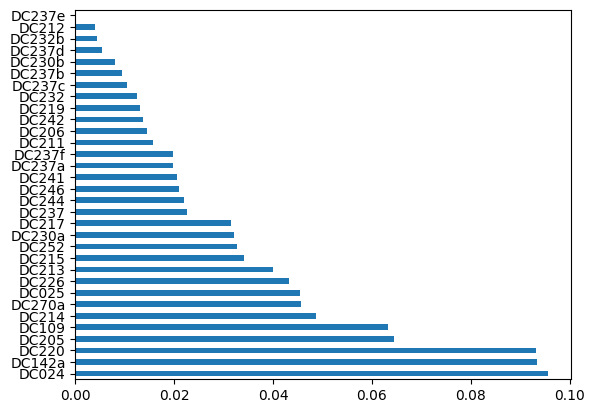

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.barh();

In [ ]:
# Compare prediction and true value
comp = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comp

,Actual,Predicted
id,,
4880,0.0,0.0
25946,0.0,0.0
24950,0.0,0.0
44779,0.0,0.0
28470,0.0,0.0
...,...,...
4679,1.0,0.0
2130,0.0,0.0
10879,0.0,0.0


In [ ]:
# show values that differ
comp.query("Actual != Predicted")

,Actual,Predicted
id,,
43011,1.0,0.0
46478,1.0,0.0
29673,1.0,0.0
30997,1.0,0.0
8619,1.0,0.0
...,...,...
35528,1.0,0.0
11530,1.0,0.0
676,0.0,1.0
